<a href="https://colab.research.google.com/github/Adithya-46/Heart-diseases-ML/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870,0.348958
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404,0.476951
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000,1.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

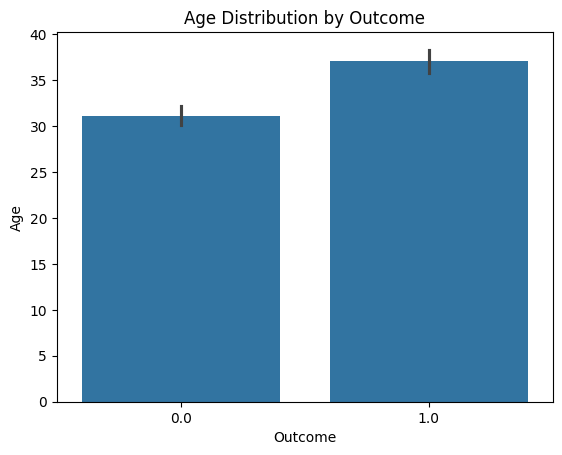

In [ ]:
sns.barplot(x="Outcome", y="Age", data=df)
plt.title("Age Distribution by Outcome")
plt.show()

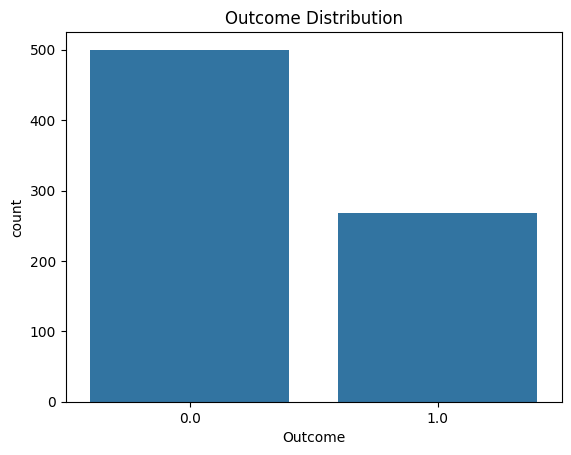

In [ ]:
sns.countplot(x="Outcome", data=df)
plt.title("Outcome Distribution")
plt.show()

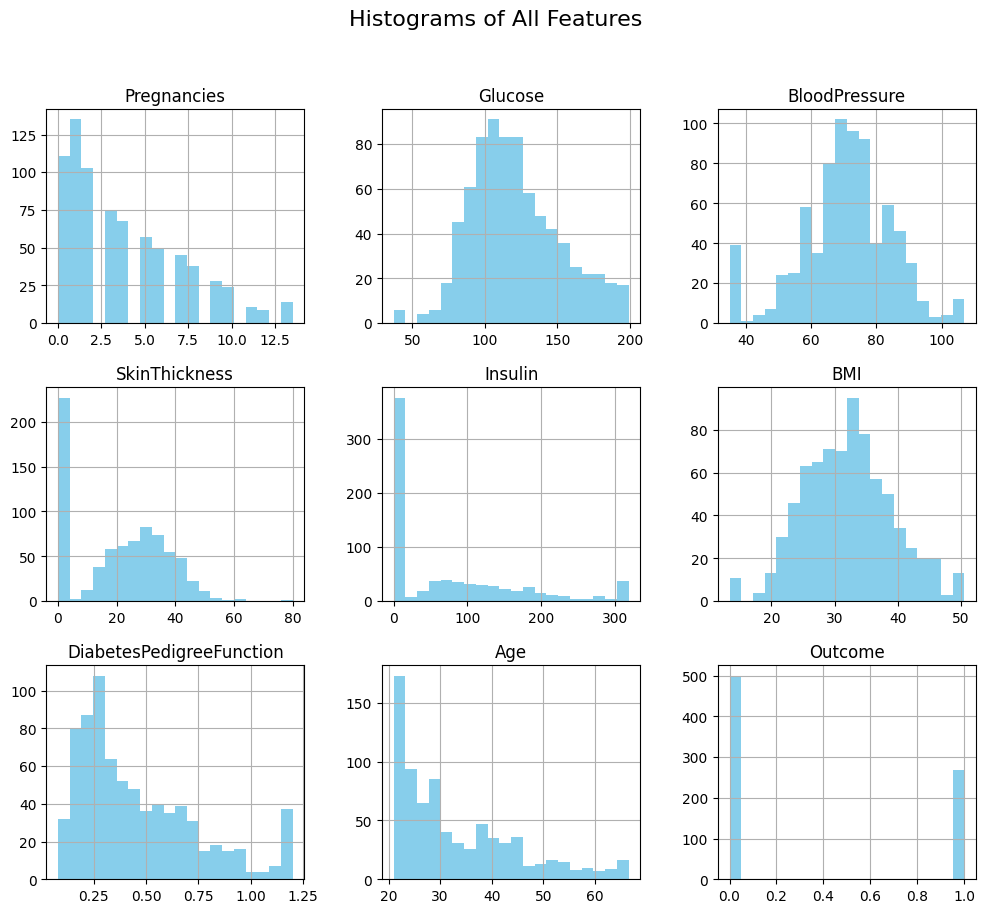

In [ ]:
df.hist(figsize=( 12,10), bins=20, color='skyblue')
plt.suptitle("Histograms of All Features", fontsize=16)
plt.show()

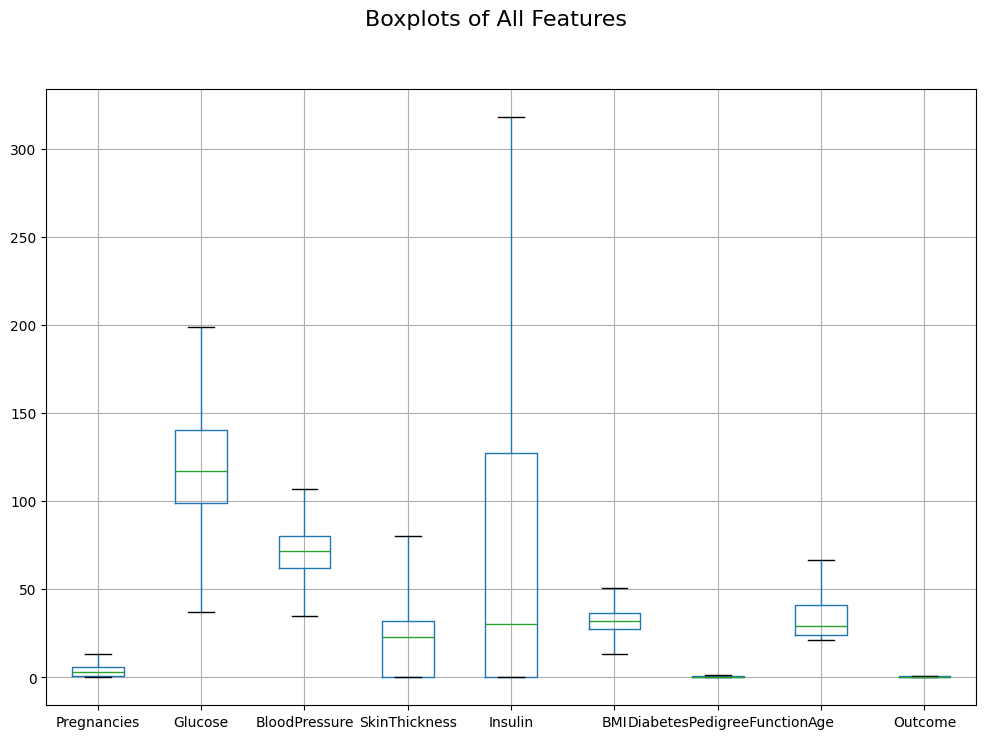

In [ ]:
df.boxplot(figsize=(12,8))
plt.suptitle("Boxplots of All Features", fontsize=16)
plt.show()

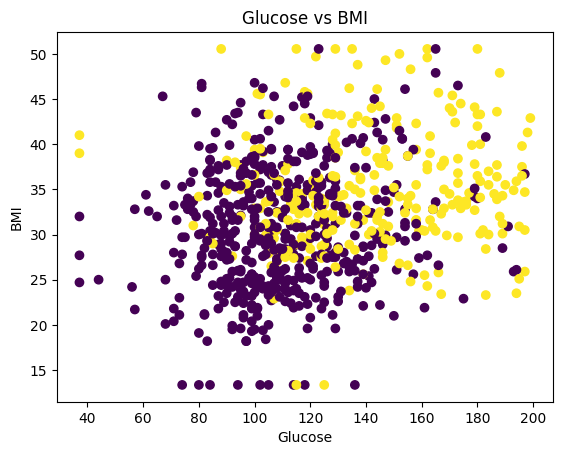

In [ ]:
plt.scatter(df['Glucose'], df['BMI'], c=df['Outcome'])
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("Glucose vs BMI")
plt.show()

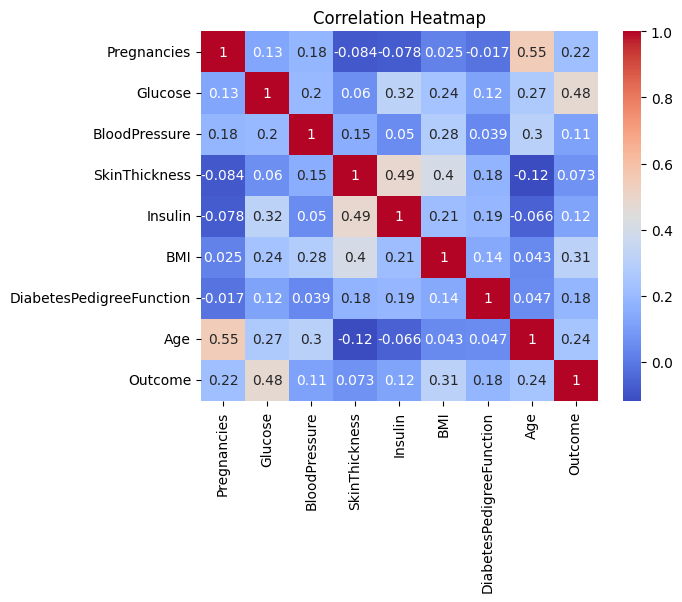

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


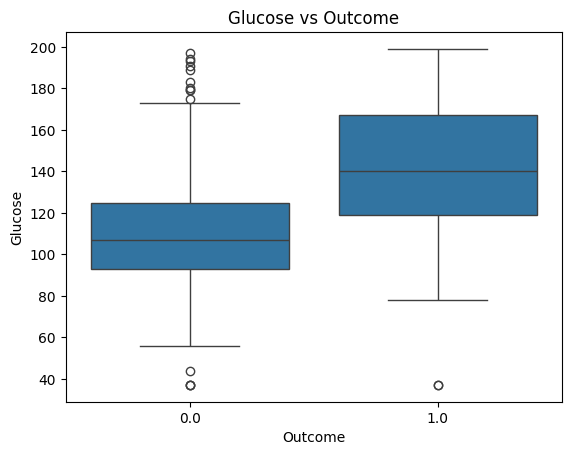

In [ ]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose vs Outcome")
plt.show()

In [ ]:
# Handle zero values in key columns (replace with NaN then impute)
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
df_clean = df.copy()
for col in columns_to_impute:
    df_clean[col] = df_clean[col].replace(0, np.nan)
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Separate features and target
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

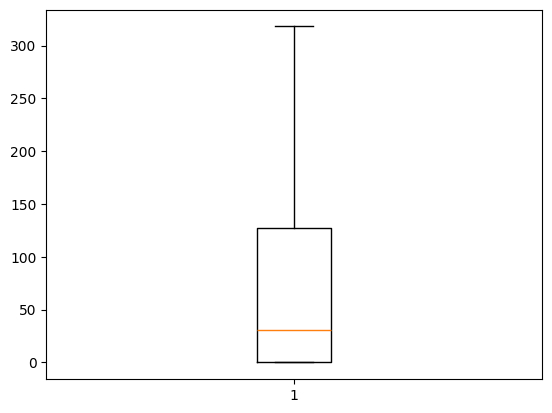

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df1['Insulin'])
plt.show()

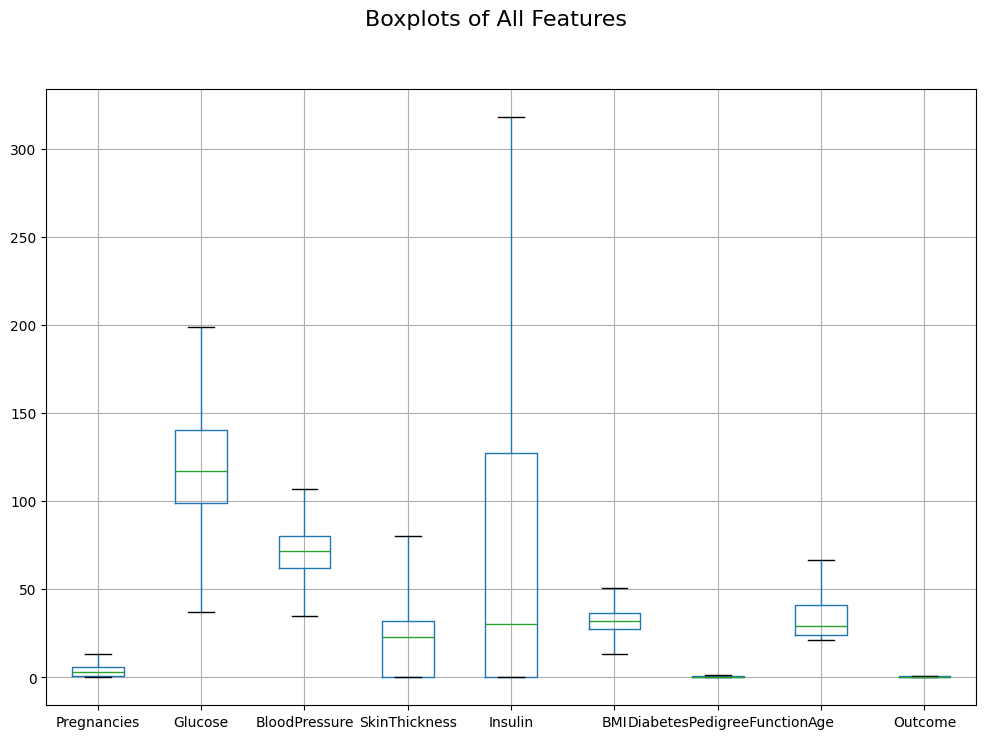

In [ ]:
df1.boxplot(figsize=(12,8))
plt.suptitle("Boxplots of All Features", fontsize=16)
plt.show()

In [ ]:
!pip install feature_engine

In [ ]:
from feature_engine.outliers import Winsorizer

In [ ]:
list1=[]
for i in df.columns:
  list1.append(i)
list1

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [ ]:
winsor=Winsorizer(capping_method='iqr',tail='both', variables=list1)

In [ ]:
winsor.fit(df)

Winsorizer(capping_method='iqr', tail='both',
           variables=['Pregnancies', 'Glucose', 'BloodPressure',
                      'SkinThickness', 'Insulin', 'BMI',
                      'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [ ]:
df1=winsor.transform(df)

In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
df1.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


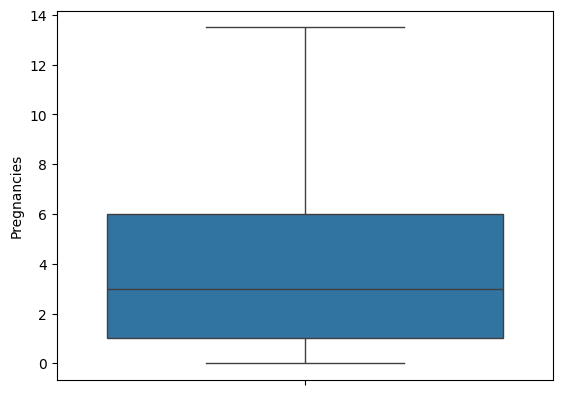

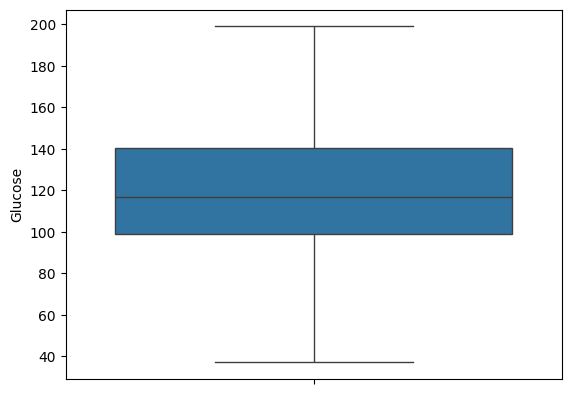

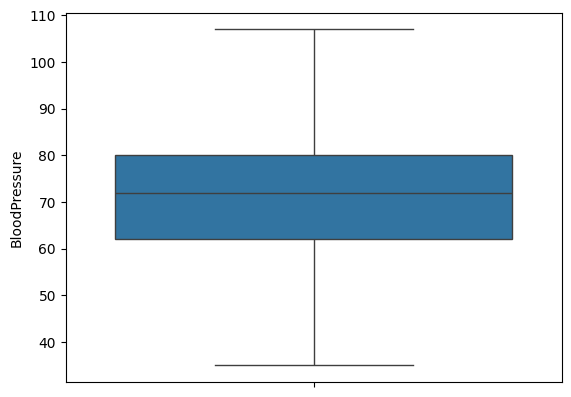

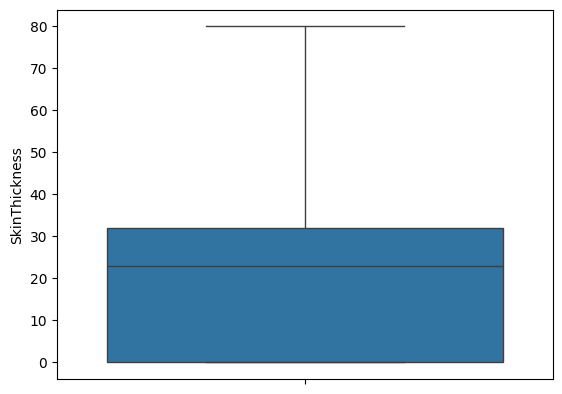

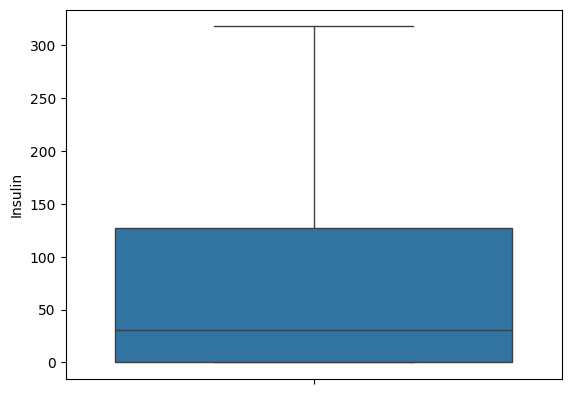

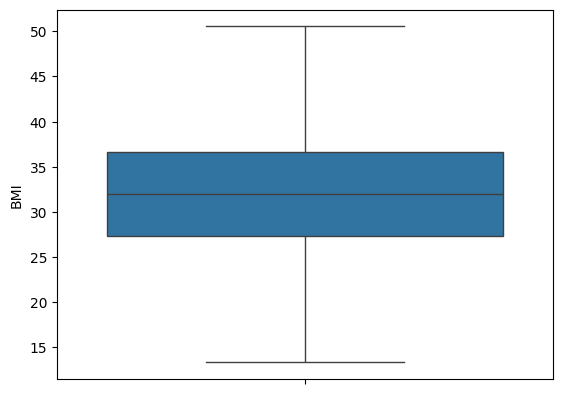

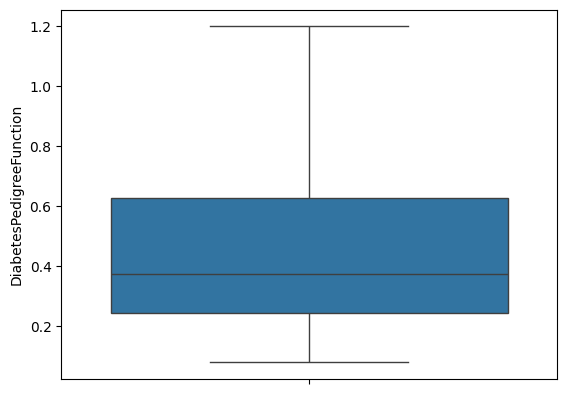

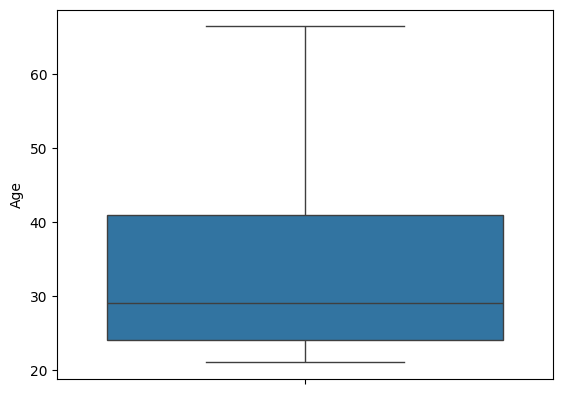

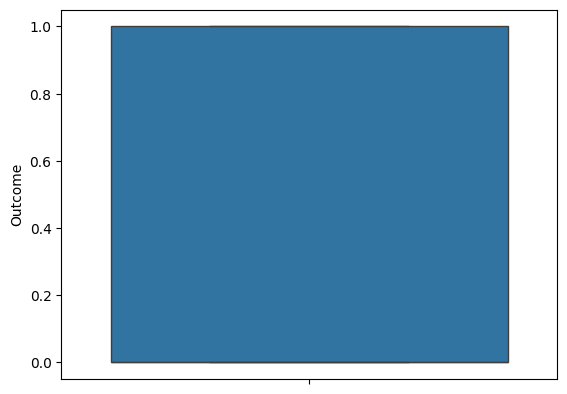

In [ ]:
for i in df1.columns:
  sns.boxplot(df1[i])
  plt.show()

In [ ]:
df_clean = df1.copy()
for col in columns_to_impute:
    df_clean[col] = df_clean[col].replace(0, np.nan)
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [ ]:
# Separate features and target
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Train final model with best params
model = KNeighborsClassifier(p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [ ]:
#Evaluate on test set
y_pred = model.predict(X_test)


In [ ]:
model.score(X_train,y_train)

0.8159609120521173

In [ ]:
model.score(X_test, y_test)

0.7532467532467533